# Project: Investigate a No-show appointments (Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or  not patients show up for their appointment. A number of characteristics about the patient are included in each row. This dataset includes 14 columns. Lets explore our dataset columns:
>
><li> PatientId: tells us the patient id.</li>
><li> AppointmentID : tells us the id of the appointment.</li>
><li> Gender: tells us the gender of the patient M for male or F for female.</li>   
><li> ScheduledDay: tells us on what day the patient set up their appointment.</li>
><li> AppointmentDay: tells us when the patient called to register the appoitment.</li>  
><li> Age: tells us the age of the patient. we can ask a question which ages don't show up for thier appointments.</li>     
><li> Neighborhood: tells us the location of the hospital.</li>
><li> Scholarship: tells us whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
><li> Hipertension: tells us if the patient suffer from Hipertension or not.</li>
><li> Diabetes: tells us if the patient suffers from Diabetes or not.</li>
><li> Alcoholism: tells us if the patient suffers from Alcoholism or not.</li>
><li> Handcap: tells us if the patient is Handcap or not.</li>
><li> SMS_received: tells us if the patient received a message or not.</li>    
><li> No-show: Be careful about the encoding of the last column: it says 'No' if the patient showed up to their                  appointment, and'Yes' if they did not show up.</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Assesment for No-show appointments
#### Visual Assesment

> In the following cell I will show the 1st 30 element from the dataframe.

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
40625,6.677117e+10,5636048,F,2016-04-28T14:28:35Z,2016-05-11T00:00:00Z,12,SANTO ANDRÉ,0,0,0,0,0,1,No
95353,8.395192e+14,5778313,M,2016-06-06T15:23:11Z,2016-06-06T00:00:00Z,2,BONFIM,0,0,0,0,0,0,No
79358,7.873373e+14,5711649,F,2016-05-18T07:54:50Z,2016-05-18T00:00:00Z,65,BONFIM,1,0,0,1,0,0,No
83830,9.694349e+13,5648240,F,2016-05-02T15:16:57Z,2016-05-02T00:00:00Z,54,MARUÍPE,0,0,0,0,0,0,No
88519,7.247140e+13,5753320,M,2016-05-31T13:51:58Z,2016-06-03T00:00:00Z,60,CRUZAMENTO,0,1,0,0,0,1,No
26051,1.439499e+14,5612945,F,2016-04-25T08:50:50Z,2016-05-12T00:00:00Z,45,SANTO ANTÔNIO,0,0,0,0,0,1,No
48864,7.437336e+14,5602969,F,2016-04-19T16:12:51Z,2016-05-03T00:00:00Z,38,CENTRO,0,0,0,0,0,1,No
107587,1.866841e+10,5647055,M,2016-05-02T12:39:03Z,2016-06-02T00:00:00Z,0,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
92186,1.188280e+13,5777883,M,2016-06-06T14:41:28Z,2016-06-07T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
3559,2.758290e+14,5701729,F,2016-05-16T10:55:10Z,2016-05-24T00:00:00Z,33,RESISTÊNCIA,0,0,0,0,0,1,No


#### Programatic Assesment

>With info I could know the shape of the table, the data type of each column, the count of null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Now, I check if there is any duplicate values.

In [5]:
df.duplicated().sum()

0

Now I explore each column unique values counts

In [6]:
df.AppointmentID.value_counts()

5769215    1
5731652    1
5707080    1
5702986    1
5715276    1
          ..
5586290    1
5584243    1
5598584    1
5602682    1
5771266    1
Name: AppointmentID, Length: 110527, dtype: int64

In [7]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [8]:
df.ScheduledDay.value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-17T12:17:46Z     1
2016-03-14T13:03:08Z     1
2016-04-14T19:18:39Z     1
2016-04-27T07:27:29Z     1
2016-04-29T09:03:05Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [9]:
df.AppointmentDay.value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [10]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [11]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [14]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [16]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [17]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [18]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [19]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Assesment Notes:
##### Quality:
> <li> Incorrect data types of Patientid, and AppointmentID.</li>
> <li> incorrect data type of ScheduledDay, AppointmentDay.</li> 
> <li> Incorrect data type of Gender and Scholarship, and Neighbourhood.</li>
> <li> Incorrect naming of No-show columns.</li>
> <li> Incorrect values in Handcap column</li>
> <li> Incorrect Data type Hipertension, Diabetes, Handcap, Alcoholism, SMS_received, No-show columns.</li>
> <li> Incorrect values in Age coluumn (-1)</li>

##### Tidiness
> <li> Renaming the columns' names to be lower</li>


### Data Cleaning for No-show appointments
#### Incorrect data types of Patientid, and AppointmentID.
##### Define
> <li> Correct the data type of Patientid, and appointmentID using astype() to string</li>
##### Code

In [21]:
df_copy = df.copy()

In [22]:
df_copy.PatientId = df_copy['PatientId'].astype('str')
df_copy.AppointmentID = df_copy['AppointmentID'].astype('str')

#### Test
> From info(), the data types and the shape of the dataframe.

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


#### Incorrect data type of ScheduledDay, AppointmentDay.
##### Define 
> <li> Correct the data type of ScheduledDay, AppointmentDay into datetime type</li>
##### Code

In [24]:
df_copy.AppointmentDay = df_copy.AppointmentDay.astype('datetime64') 

In [25]:
df_copy.ScheduledDay = df_copy.ScheduledDay.astype('datetime64') 

##### Test

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

#### Incorrect Data Type of Gender and Scholarship.
##### Define
> <li> Correct the data types of Gender and Scholarship into Category data type. </li>
##### Code

In [27]:
df_copy.Gender = df_copy.Gender.astype('category')
df_copy.Scholarship = df_copy.Scholarship.astype('category')
df_copy.Neighbourhood = df_copy.Neighbourhood.astype('category')

##### Test

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  category      
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  category      
 7   Scholarship     110527 non-null  category      
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: category(3), datetime64[ns](2), i

#### Incorrect naming of No-show columns
##### Define 
><li> Correct the name of No-show to no_show </li>

##### Code

In [29]:
df_copy.rename(columns = {'No-show': 'no_show'}, inplace = True)

##### Test

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  category      
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  category      
 7   Scholarship     110527 non-null  category      
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  no_show         110527 non-null  object        
dtypes: category(3), datetime64[ns](2), i

#### Incorrect values in Handcap column
##### Define
>Changing the values in Handicap which equal 2,3,4 to 1, since the Handicap column should equal to 0 or 1 which means True >or False according to the data description on kaggel. In this case, We have two options:
> <li>To remove this data and consider it as mistake</li>
> <li>To change this data into 1, and consider it number of disabilities.</li>
> I choose the second solution, so I will change all these values into 1, which means there is a disability.
##### Code

In [31]:
df_copy.loc[(df_copy.Handcap > 1), ('Handcap')] = 1

##### Test

In [32]:
df_copy.Handcap.value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

#### Incorrect Data Type Hipertension, Diabetes, Handcap, Alcoholism, SMS_received, No-show columns.
##### Define
><li>Converting the data type of Hipertension, Diabetes, Handcap, Alcoholism, SMS_received,  into category</li>
##### Code

In [33]:
df_copy.Hipertension = df_copy.Hipertension.astype('category')
df_copy.Diabetes = df_copy.Diabetes.astype('category')
df_copy.Handcap = df_copy.Handcap.astype('category')
df_copy. Alcoholism = df_copy. Alcoholism.astype('category')
df_copy.SMS_received = df_copy.SMS_received.astype('category')


##### Test

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  category      
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  category      
 7   Scholarship     110527 non-null  category      
 8   Hipertension    110527 non-null  category      
 9   Diabetes        110527 non-null  category      
 10  Alcoholism      110527 non-null  category      
 11  Handcap         110527 non-null  category      
 12  SMS_received    110527 non-null  category      
 13  no_show         110527 non-null  object        
dtypes: category(8), datetime64[ns](2), i

#### Incorrect values in Age coluumn (-1)
##### Define
> Droping the row which has Age = -1
##### Code

In [35]:
df_copy = df_copy[df_copy.Age != -1]


##### Test

In [36]:
df_copy.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

#### Renaming the columns' names
##### Define
> <li> Renaming the columns' names to be lower using rename() </li>

##### Code

In [37]:
df_copy.columns = df_copy.columns.str.lower()

##### Test

In [38]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110526 non-null  object        
 1   appointmentid   110526 non-null  object        
 2   gender          110526 non-null  category      
 3   scheduledday    110526 non-null  datetime64[ns]
 4   appointmentday  110526 non-null  datetime64[ns]
 5   age             110526 non-null  int64         
 6   neighbourhood   110526 non-null  category      
 7   scholarship     110526 non-null  category      
 8   hipertension    110526 non-null  category      
 9   diabetes        110526 non-null  category      
 10  alcoholism      110526 non-null  category      
 11  handcap         110526 non-null  category      
 12  sms_received    110526 non-null  category      
 13  no_show         110526 non-null  object        
dtypes: category(8), datetime64[ns](2), i

<a id='eda'></a>
## Exploratory Data Analysis
### Q1: Comparison between different disease and their attendance?
#### Hipertension

In [39]:
df_analysis = df_copy.copy()

In [40]:
hipertension_patient = df_analysis[df_analysis.hipertension == 1].no_show
hipertension_patient.shape

(21801,)

In [41]:
hipertension_patient.value_counts()

No     18029
Yes     3772
Name: no_show, dtype: int64

In [42]:
not_hipertension_patient = df_analysis[df_analysis.hipertension == 0].no_show
not_hipertension_patient.shape

(88725,)

In [43]:
not_hipertension_patient.value_counts()

No     70178
Yes    18547
Name: no_show, dtype: int64

From the above Calculations, we can say that the precentage of hypertension patients who don't show up is 17.3%.
And the precentage of no hypertension patients who don't show up is 21%

#### Diabetes

In [44]:
diabetes_patient = df_analysis[df_analysis.diabetes == 1].no_show
diabetes_patient.shape

(7943,)

In [45]:
not_diabetes_patient = df_analysis[df_analysis.diabetes == 0].no_show
not_diabetes_patient.shape

(102583,)

In [46]:
diabetes_patient.value_counts()

No     6513
Yes    1430
Name: no_show, dtype: int64

In [47]:
not_diabetes_patient.value_counts()

No     81694
Yes    20889
Name: no_show, dtype: int64

>From the above Calculations, we can say that the precentage of diabetes patients who don't show up is 18%.
>And the precentage of no diabetes patients who don't show up is 20.3%
#### Alcoholism

In [48]:
alkoholism_patient = df_analysis[df_analysis.alcoholism == 1].no_show
alkoholism_patient.shape

(3360,)

In [49]:
alkoholism_patient.value_counts()

No     2683
Yes     677
Name: no_show, dtype: int64

In [50]:
not_alkoholism_patient = df_analysis[df_analysis.alcoholism == 0].no_show
not_alkoholism_patient.shape

(107166,)

In [51]:
not_alkoholism_patient.value_counts()

No     85524
Yes    21642
Name: no_show, dtype: int64

>From the above Calculations, we can say that the precentage of alkoholism patients who don't show up is 25%.
>And the precentage of not alkoholism patients who don't show up is 20.2%
#### Handicap


In [52]:
hanadicap_patient = df_analysis[df_analysis.handcap == 1].no_show
hanadicap_patient.shape

(2241,)

In [53]:
hanadicap_patient.value_counts()

No     1834
Yes     407
Name: no_show, dtype: int64

In [54]:
not_handicap_patient = df_analysis[df_analysis.handcap == 0].no_show
not_handicap_patient.shape

(108285,)

In [55]:
not_handicap_patient.value_counts()

No     86373
Yes    21912
Name: no_show, dtype: int64

>From the above Calculations, we can say that the precentage of Hndicap patients who don't show up is 18.2%.
>And the precentage of not Hndicap patients who don't show up is 20.2%

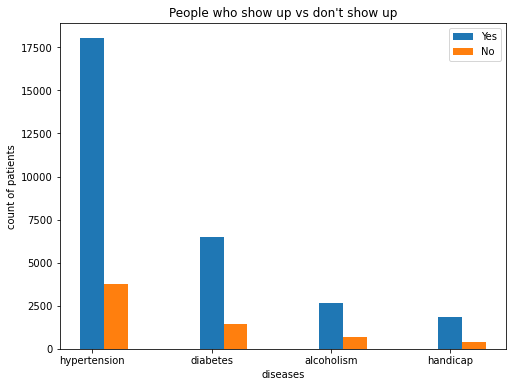

In [56]:
deseis_show_ls = []
deseis_show_ls.append(hipertension_patient.value_counts()['No'])
deseis_show_ls.append(diabetes_patient.value_counts()['No'])
deseis_show_ls.append(alkoholism_patient.value_counts()['No'])
deseis_show_ls.append(hanadicap_patient.value_counts()['No'])

no_deseis_show_ls= []

no_deseis_show_ls.append(hipertension_patient.value_counts()['Yes'])
no_deseis_show_ls.append(diabetes_patient.value_counts()['Yes'])
no_deseis_show_ls.append(alkoholism_patient.value_counts()['Yes'])
no_deseis_show_ls.append(hanadicap_patient.value_counts()['Yes'])

labels = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
legend_labels = ['Yes','No']
width =0.2
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(deseis_show_ls)), deseis_show_ls, width=width, tick_label = labels)
plt.bar(np.arange(len(no_deseis_show_ls))+ width, no_deseis_show_ls, width=width)
plt.legend(legend_labels)
plt.title("People who show up vs don't show up")
plt.xlabel("diseases")
plt.ylabel("count of patients")
plt.show()

>From the above figure, we can say that:
> <li>The hypertension is the most common disease between patients</li>
> <li>no_show column doesn't depend on the colum of hypertension, diabetes, alkholism, handicap </li>
> <li>The handicap is is least common disease beteen patients</li>
> <li>The hypertension is the most common disease between patients since there are more than 20000 who have it compared to others.</li>
> <li>The handicap is is least common disease beteen patients</li>



### Q2  No-show Neighbourhood  vs show Neighbourhood for the highest 6 Neighbourhood

#### JARDIM CAMBURI Neighbourhood

In [57]:
neighbourhood_ser = df_analysis.neighbourhood.value_counts()
neighbourhood_ser

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [58]:
JARDIM_CAMBURI = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[0]].no_show
JARDIM_CAMBURI.value_counts()

No     6252
Yes    1465
Name: no_show, dtype: int64

#### MARIA ORTIZ Neighbourhood

In [59]:
MARIA_ORTIZ = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[1]].no_show
MARIA_ORTIZ.value_counts()

No     4586
Yes    1219
Name: no_show, dtype: int64

#### RESISTÊNCIA Neighbourhood

In [60]:
RESISTÊNCIA = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[2]].no_show
RESISTÊNCIA.value_counts()

No     3525
Yes     906
Name: no_show, dtype: int64

#### JARDIM DA PENHA Neighbourhood

In [61]:
JARDIM_DA_PENHA = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[3]].no_show
JARDIM_DA_PENHA.value_counts()

No     3246
Yes     631
Name: no_show, dtype: int64

#### ITARARÉ Neighbourhood

In [62]:
ITARARÉ = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[4]].no_show
ITARARÉ.value_counts()

No     2591
Yes     923
Name: no_show, dtype: int64

#### CENTRO neighbourhood

In [63]:
CENTRO = df_analysis[df_analysis.neighbourhood == neighbourhood_ser.index[5]].no_show
CENTRO.value_counts()


No     2631
Yes     703
Name: no_show, dtype: int64

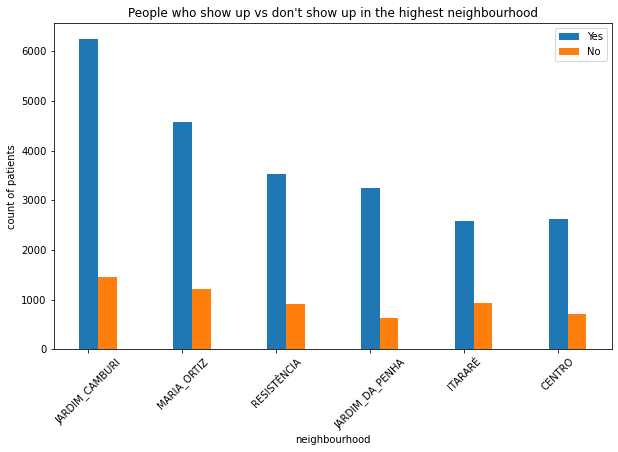

In [64]:
show_ls = []
show_ls.append(JARDIM_CAMBURI.value_counts()['No'])
show_ls.append(MARIA_ORTIZ.value_counts()['No'])
show_ls.append(RESISTÊNCIA.value_counts()['No'])
show_ls.append(JARDIM_DA_PENHA.value_counts()['No'])
show_ls.append(ITARARÉ.value_counts()['No'])
show_ls.append(CENTRO.value_counts()['No'])

no_show_ls = []

no_show_ls.append(JARDIM_CAMBURI.value_counts()['Yes'])
no_show_ls.append(MARIA_ORTIZ.value_counts()['Yes'])
no_show_ls.append(RESISTÊNCIA.value_counts()['Yes'])
no_show_ls.append(JARDIM_DA_PENHA.value_counts()['Yes'])
no_show_ls.append(ITARARÉ.value_counts()['Yes'])
no_show_ls.append(CENTRO.value_counts()['Yes'])

labels = ['JARDIM_CAMBURI', 'MARIA_ORTIZ', 'RESISTÊNCIA', 'JARDIM_DA_PENHA', 'ITARARÉ', 'CENTRO']

width =0.2
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(show_ls)), show_ls, width=width, tick_label = labels)
plt.bar(np.arange(len(no_show_ls))+ width, no_show_ls, width=width)
plt.xticks(rotation=45)
plt.legend(legend_labels)

plt.title("People who show up vs don't show up in the highest neighbourhood")
plt.xlabel("neighbourhood")
plt.ylabel("count of patients")

plt.show()

> From above Figure, we can say that:
><li>JARDIM CAMBURI Neighbourhood has the highest number of patients who show up</li>
><li>ITARARÉ and CENTRO neighbouhoods may have the near number of patients who show up </li>


### Q3 what is the relation between neighbourhood and participation in Bolsa Família program and show up?

In [65]:
neighbour_participated = df_analysis[df_analysis.scholarship == 1][['neighbourhood','no_show']]
neighbour_participated.no_show.value_counts()

No     8283
Yes    2578
Name: no_show, dtype: int64

In [66]:
neighbour_participated.neighbourhood.value_counts()

ILHA DO PRÍNCIPE     579
TABUAZEIRO           537
RESISTÊNCIA          468
CARATOÍRA            456
SANTA MARTHA         441
                    ... 
MORADA DE CAMBURI      0
BARRO VERMELHO         0
ILHA DO BOI            0
ILHA DO FRADE          0
AEROPORTO              0
Name: neighbourhood, Length: 81, dtype: int64

In [67]:
neighbour_participated.describe()

,neighbourhood,no_show
count,10861,10861
unique,73,2
top,ILHA DO PRÍNCIPE,No
freq,579,8283


> From above calculations, we can say that:
><li>The ILHA DO PRÍNCIPE  neighbouhood has the highest number of people who participated in the Bolsa Família program</li> 
><li>ILHA DO PRÍNCIPE has only 579 participated in the program</li>
><li>There are only 73 of neighbouhoods participate in the the Bolsa Família program</li>
><li>There are 8283 of 10861 who participate in the the Bolsa Família program and don't show up</li>

In [68]:
neighbour_not_participated = df_analysis[df_analysis.scholarship == 0][['neighbourhood','no_show']]

In [69]:
neighbour_not_participated.describe()

,neighbourhood,no_show
count,99665,99665
unique,81,2
top,JARDIM CAMBURI,No
freq,7558,79924


> From above calculations, we can say that:
><li>The JARDIM CAMBURI neighbouhood has the highest number of people who don't participated in the Bolsa Família program</li> 
><li>JARDIM CAMBURI has only 7558 participated in the program</li>
><li>There are people from all neighbouhoods who doen't participate in the the Bolsa Família program</li>
><li>There are only 79924 of 99665 who participate in the the Bolsa Família program and show up</li>

#### Q4 what is the precentage of pepole who recived message and show up appointment?

In [70]:
sms_received_patient = df_analysis[df_analysis.sms_received == 1].no_show
sms_received_patient.value_counts()


No     25698
Yes     9784
Name: no_show, dtype: int64

In [71]:
sms_not_received_patient = df_analysis[df_analysis.sms_received == 0].no_show
sms_not_received_patient.value_counts()

No     62509
Yes    12535
Name: no_show, dtype: int64

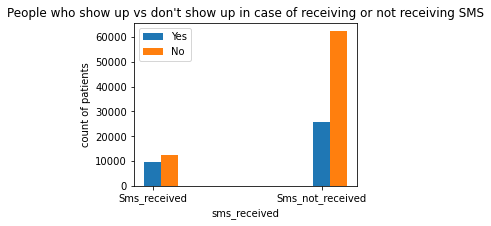

In [72]:
sms_received_ls = [sms_received_patient.value_counts()['Yes'],sms_received_patient.value_counts()['No']]
sms_not_received_ls = [sms_not_received_patient.value_counts()['Yes'],sms_not_received_patient.value_counts()['No']]

legend_labels =['Yes', 'No']
labels = ['Sms_received', 'Sms_not_received']
width =0.1
plt.figure(figsize=(4,3))
plt.bar(np.arange(len(sms_received_ls)),sms_received_ls, width=width, tick_label = labels)
plt.bar(np.arange(len(sms_not_received_ls))+ width, sms_not_received_ls, width=width)
plt.title("People who show up vs don't show up in case of receiving or not receiving SMS")
plt.xlabel("sms_received")
plt.ylabel("count of patients")
plt.legend(legend_labels)

plt.show()

> There are many people who don't receive the sms but show up.

#### Q5 what is the distribution of appointments among days of week (Monday-Friday)?

In [73]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110526 non-null  object        
 1   appointmentid   110526 non-null  object        
 2   gender          110526 non-null  category      
 3   scheduledday    110526 non-null  datetime64[ns]
 4   appointmentday  110526 non-null  datetime64[ns]
 5   age             110526 non-null  int64         
 6   neighbourhood   110526 non-null  category      
 7   scholarship     110526 non-null  category      
 8   hipertension    110526 non-null  category      
 9   diabetes        110526 non-null  category      
 10  alcoholism      110526 non-null  category      
 11  handcap         110526 non-null  category      
 12  sms_received    110526 non-null  category      
 13  no_show         110526 non-null  object        
dtypes: category(8), datetime64[ns](2), i

In [74]:
df_analysis['dayOfWeek'] = df_analysis['scheduledday'].dt.day_name() 
scheduled_days = df_analysis['dayOfWeek'].value_counts()
scheduled_days

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: dayOfWeek, dtype: int64

<AxesSubplot:title={'center':' Distribution of appointments among days of week'}>

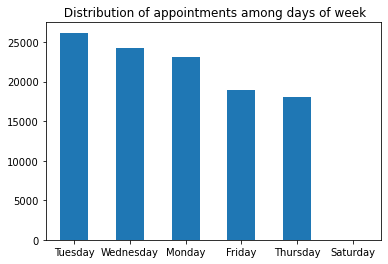

In [75]:
scheduled_days.plot(kind="bar",rot=0, title =" Distribution of appointments among days of week")

> From the above calculations, 
> <li>we can say that Tuesday has the most sheduled appoitments.</li> 
> <li>we can say that Saturday has the least sheduled appoitments.</li>  

#### Q6 what the relation between show and no-show appointments and days of week?

In [76]:
show_days = df_analysis[df_analysis.no_show == 'No'].dayOfWeek
show_days.value_counts()

Tuesday      20877
Wednesday    19383
Monday       18523
Friday       15028
Thursday     14373
Saturday        23
Name: dayOfWeek, dtype: int64

In [77]:
no_show_days = df_analysis[df_analysis.no_show == 'Yes'].dayOfWeek
no_show_days.value_counts()

Tuesday      5291
Wednesday    4879
Monday       4561
Friday       3887
Thursday     3700
Saturday        1
Name: dayOfWeek, dtype: int64

#### Q7 what the relation between gender and Show up?

In [78]:
show_up_gender = df_analysis[df_analysis.no_show == 'No'].gender
show_up_gender.value_counts()

F    57245
M    30962
Name: gender, dtype: int64

In [79]:
NO_show_up_gender = df_analysis[df_analysis.no_show == 'Yes'].gender
NO_show_up_gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [80]:
female = df_analysis[df_analysis.gender == 'F']
female.shape

(71839, 15)

In [81]:
male = df_analysis[df_analysis.gender == 'M']
male.shape

(38687, 15)

> There are females more than Males.
> <li>There 79 % of females show up</li>
> <li>There 80 % of females show up</li>

#### Q8 what the relation between age and Show up?

In [82]:
no_show_up_age = df_analysis[df_analysis.no_show == 'Yes'].age
show_up_age = df_analysis[df_analysis.no_show == 'No'].age

<AxesSubplot:>

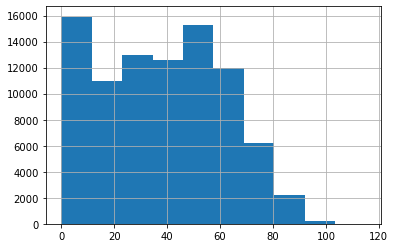

In [83]:
show_up_age.hist()

<AxesSubplot:>

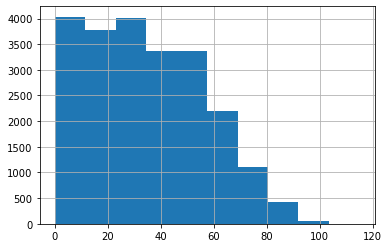

In [84]:
no_show_up_age.hist()

> From this histograms: 
><li> The people who show up in age range [0 : 10] [45 : 58] </li>   
><li> The most of people who don't show up in age range [0 : 12] and [23 : 35]  </li>   

#### Q7 What the factors which help to predict if a patient will show up for the scheduled appointment?

> From above questions and answers, I can suggest that the show up depends on the region or neighbourhood, and the day of the week. 

<a id='conclusions'></a>
## Conclusions
>From above questions and answers, we can summarize the following:
> <li> The diseases of hypertension, diabetes, alcoholism, and Handicap don't correlate positively or negatively to determine who will attend in the scheduled appointment or not (see Q1).</li> 
><li> There is a correlation between appointment attendance and the neighbourhood, since the JARDIM CAMBURI Neighbourhood has the highest number of patients who show up</li>
><li>There is a relationship between the Neighbourhood and scholarship columns, The ILHA DO PRÍNCIPE neighbourhood has the highest number of people who participated in the Bolsa Família program.</li>
><li>There is a negative correlation between the columns of no_show and scholarship which indicates participation in the the Bolsa Família program</li>
><li>The SMS is not important to indicate show up or no. </li>
><li>There is a relation beween day_of_week and no)show column, since we can say that Tuesday has the most scheduled appointments and Saturday has the least scheduled appointments.</li>
><li>The gender doesn't affect on the no_show column</li>
